In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../scenes/')
import syndiff as sd 
from delta_kernal import *
import pandas as pd

In [15]:
t = np.load('2020fqv_single_pix.npy')
tm = -2.5*np.log10(t[1,:])+19.5
#tm = -2.5*np.log10(test)+21

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [6]:
def Six_med(Data):
    time = Data[:,0]
    lc = Data[:,1]
    steps = round((time[-1]-time[0]) * 4) # 4 lots of 6 hours in a day
    
    six_time = []
    six_lc = []
    for i in range(int(steps)):
        obs = np.where((time >= time[0]+i) & (time < time[0]+(i+1)))[0]
        six_time += [np.nanmean(time[obs])]
        six_lc += [np.nanmean(lc[obs])]
    six = np.ones((len(six_time),2))
    six[:,0] = six_time
    six[:,1] = six_lc
    return six

In [7]:
gd = pd.read_csv('2020fqv_yse.csv')

In [8]:
ind = np.where(np.isfinite(t[0]))[0]
data = np.array([t[0,ind]-58930,t[1,ind]])
#data = np.array([t[0,ind]-58930,test])


In [21]:
data.shape

(2, 1235)

In [9]:
six = Six_med(data.T)

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


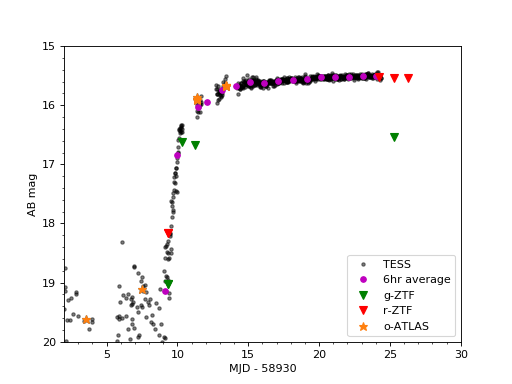

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
plt.figure()
plt.plot(t[0]-58930,tm,'k.',alpha=0.5,label='TESS')
plt.plot(six[:,0],-2.5*np.log10(six[:,1]) + 19.5,'m.',ms=10,label='6hr average')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='g-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='g-ZTF'],'gv',ms=8,label='g-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='r-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'],'rv',ms=8,label='r-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'].values,'*',ms=8)
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'],'*',ms=8,label='o-ATLAS')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='i']-58930,gd['MAG'].iloc[gd['FLT'].values=='i'],'ko',ms=8)


plt.legend(loc=4)
plt.ylim(20,15)
plt.xlim(2,30)
plt.xlabel('MJD - 58930')
plt.ylabel('AB mag')
plt.minorticks_on()
plt.savefig('2020fqv_progress.pdf')

In [17]:
gt = gd['MJD'].iloc[gd['FLT'].values=='g-ZTF'].values-58930
gm = gd['MAG'].iloc[gd['FLT'].values=='g-ZTF'].values
rt = gd['MJD'].iloc[gd['FLT'].values=='r-ZTF'].values-58930
rm = gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'].values
ot = gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS'].values-58930
om = gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'].values

In [40]:
def mag_2_cts(mag):
    cts = 10**(-1/2.5*(mag - 19.53))
    return cts

<IPython.core.display.Javascript object>


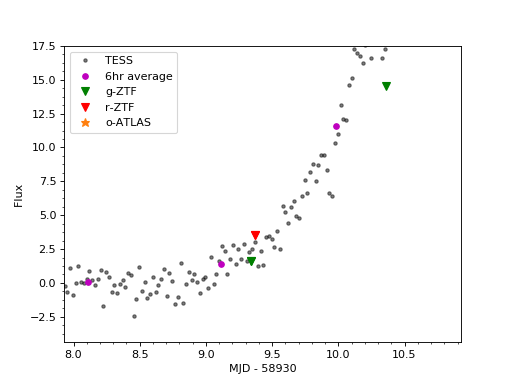

In [43]:
plt.figure()
plt.plot(t[0]-58930,t[1],'k.',alpha=0.5,label='TESS')
plt.plot(six[:,0],six[:,1],'m.',ms=10,label='6hr average')
plt.plot(gt,mag_2_cts(gm),'gv',ms=8,label='g-ZTF')
plt.plot(rt,mag_2_cts(rm),'rv',ms=8,label='r-ZTF')
plt.plot(ot,mag_2_cts(om),'*',ms=1)
plt.plot(ot,mag_2_cts(om),'*',ms=8,label='o-ATLAS')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'],'*',ms=8,label='o-ATLAS')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='i']-58930,gd['MAG'].iloc[gd['FLT'].values=='i'],'ko',ms=8)


plt.legend()
#plt.ylim(21,15.5)
plt.xlim(5.5,26)
plt.xlabel('MJD - 58930')
plt.ylabel('Flux ')
plt.minorticks_on()
plt.savefig('2020fqv_progress_flux.pdf')

In [ ]:
tp

In [53]:
np.where(t[0]-58930>0)

(array([ 115,  116,  117, ..., 1232, 1233, 1234]),)

In [9]:
from astropy.modeling import models, fitting

In [30]:
fit_flux = t[1,100:530]
fit_time = t[0,100:530]-58930
fit = fitting.LinearLSQFitter()
line_init = models.Linear1D()
fitted_line = fit(line_init, fit_time, fit_flux)

<IPython.core.display.Javascript object>


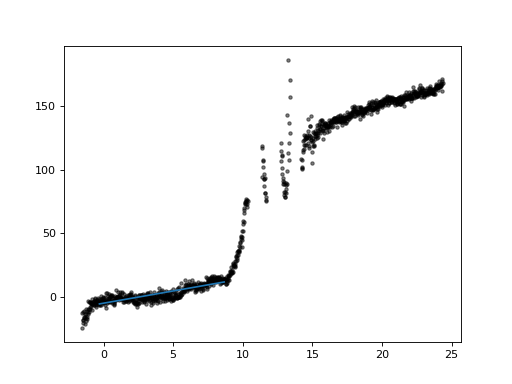

In [31]:
plt.figure()
plt.plot(t[0]-58930,t[1],'k.',alpha=0.5,label='TESS')
plt.plot(fit_time, fitted_line(fit_time), '-', label='Fitted Model')

<IPython.core.display.Javascript object>


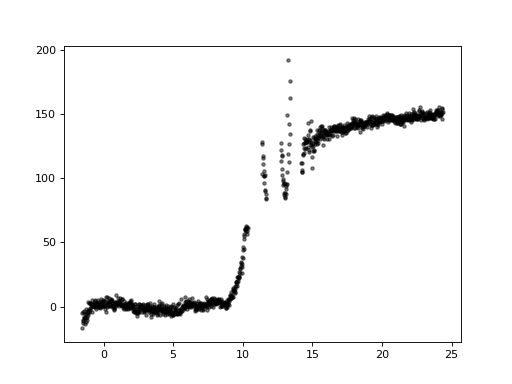

In [32]:
plt.figure()
plt.plot(t[0]-58930,test,'k.',alpha=0.5,label='TESS')

In [14]:
test = t[1].copy()
test[0:611] -= fitted_line(t[0,0:611]-58930)
test[611:] -= fitted_line(t[0,0:624]-58930)

In [13]:
test = t[1,611:] - fitted_line(t[0,0:624]-58930)

<IPython.core.display.Javascript object>


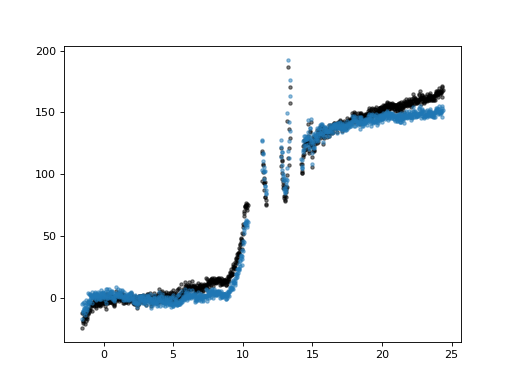

In [15]:
plt.figure()
plt.plot(t[0]-58930,t[1],'k.',alpha=0.5,label='TESS')
plt.plot(t[0]-58930,test,'.',alpha=0.5,label='TESS')